In [4]:
import os
os.chdir('E:\projects\Stock_Price_Prediction')

In [4]:
ls

bajaj-2003-2020.csv


In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('bajaj-2003-2020.csv')

In [7]:
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
0,BAJAUTOFIN,EQ,01-Jan-2003,48.10,49.5,49.50,48.5,49.0,49.00,49.14,3595,176665.00,-
1,BAJAUTOFIN,EQ,02-Jan-2003,49.00,49.0,49.25,49.0,49.0,49.00,49.04,1975,96852.50,-
2,BAJAUTOFIN,EQ,03-Jan-2003,49.00,48.0,49.25,48.0,49.1,49.15,48.83,761,37158.75,-
3,BAJAUTOFIN,EQ,06-Jan-2003,49.15,46.0,48.75,46.0,48.5,48.55,48.27,809,39054.25,-
4,BAJAUTOFIN,EQ,07-Jan-2003,48.55,47.0,49.25,47.0,49.0,49.00,48.86,1138,55606.50,-


In [8]:
df.tail()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
4383,BAJFINANCE,EQ,20-Jul-2020,3301.30,3344.95,3453.95,3316.50,3436.00,3441.50,3389.56,10556334,3.578134e+10,358852
4384,BAJFINANCE,EQ,21-Jul-2020,3441.50,3500.00,3519.50,3218.65,3304.00,3292.45,3385.18,25960105,8.787972e+10,979111
4385,BAJFINANCE,EQ,22-Jul-2020,3292.45,3320.00,3340.00,3193.60,3250.00,3253.00,3265.62,17070171,5.574463e+10,644441
4386,BAJFINANCE,EQ,23-Jul-2020,3253.00,3253.00,3320.00,3216.05,3296.05,3297.80,3288.19,8718708,2.866877e+10,315794
4387,BAJFINANCE,EQ,24-Jul-2020,3297.80,3245.00,3290.00,3220.00,3250.00,3251.85,3251.26,6637888,2.158147e+10,257319


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4388 entries, 0 to 4387
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Symbol                 4388 non-null   object 
 1   Series                 4388 non-null   object 
 2   Date                   4388 non-null   object 
 3   Prev Close             4388 non-null   float64
 4   Open Price             4388 non-null   float64
 5   High Price             4388 non-null   float64
 6   Low Price              4388 non-null   float64
 7   Last Price             4388 non-null   float64
 8   Close Price            4388 non-null   float64
 9   Average Price          4388 non-null   float64
 10  Total Traded Quantity  4388 non-null   int64  
 11  Turnover               4388 non-null   float64
 12  No. of Trades          4388 non-null   object 
dtypes: float64(8), int64(1), object(4)
memory usage: 445.8+ KB


In [10]:
plot_x = df['Date'].copy()
df.set_index("Date", inplace = True)
df.index = pd.to_datetime(df.index)
df.head(2)

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
Date,,,,,,,,,,,,
2003-01-01,BAJAUTOFIN,EQ,48.1,49.5,49.50,48.5,49.0,49.0,49.14,3595,176665.0,-
2003-01-02,BAJAUTOFIN,EQ,49.0,49.0,49.25,49.0,49.0,49.0,49.04,1975,96852.5,-


In [11]:
dff = df[df['Symbol'] == 'BAJFINANCE']
dff.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
Date,,,,,,,,,,,,
2010-09-29,BAJFINANCE,EQ,793.60,780.0,805.00,770.00,776.00,774.60,783.42,26000,20369029.10,-
2010-09-30,BAJFINANCE,EQ,774.60,775.0,783.45,766.25,772.00,773.55,774.33,17350,13434686.25,-
2010-10-01,BAJFINANCE,EQ,773.55,763.0,797.30,760.25,773.60,774.95,780.22,35941,28041955.80,-
2010-10-04,BAJFINANCE,EQ,774.95,788.0,795.00,775.00,786.65,783.40,786.88,31160,24519305.25,-
2010-10-05,BAJFINANCE,EQ,783.40,775.1,788.00,772.05,778.95,779.00,778.79,32141,25031172.60,-


In [12]:
dff1 = dff[dff['Series'] == 'EQ']
dff1.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
Date,,,,,,,,,,,,
2010-09-29,BAJFINANCE,EQ,793.60,780.0,805.00,770.00,776.00,774.60,783.42,26000,20369029.10,-
2010-09-30,BAJFINANCE,EQ,774.60,775.0,783.45,766.25,772.00,773.55,774.33,17350,13434686.25,-
2010-10-01,BAJFINANCE,EQ,773.55,763.0,797.30,760.25,773.60,774.95,780.22,35941,28041955.80,-
2010-10-04,BAJFINANCE,EQ,774.95,788.0,795.00,775.00,786.65,783.40,786.88,31160,24519305.25,-
2010-10-05,BAJFINANCE,EQ,783.40,775.1,788.00,772.05,778.95,779.00,778.79,32141,25031172.60,-


In [13]:
df1=dff1.reset_index()['Close Price']

In [14]:
df1

0        774.60
1        773.55
2        774.95
3        783.40
4        779.00
         ...   
2428    3441.50
2429    3292.45
2430    3253.00
2431    3297.80
2432    3251.85
Name: Close Price, Length: 2433, dtype: float64

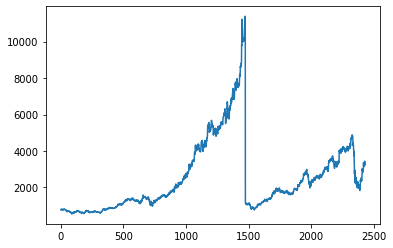

In [15]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [16]:
import numpy as np

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
print(df1)

[[0.02121874]
 [0.02112196]
 [0.021251  ]
 ...
 [0.24966586]
 [0.25379532]
 [0.24955986]]


In [19]:
#splitting dataset into train and test split
training_size=int(len(df1)*0.8)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [20]:
training_size,test_size

(1946, 487)

In [21]:
train_data

array([[0.02121874],
       [0.02112196],
       [0.021251  ],
       ...,
       [0.19700154],
       [0.19995576],
       [0.1966651 ]])

In [22]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [23]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [24]:
print(X_train.shape), print(y_train.shape)

(1845, 100)
(1845,)


(None, None)

In [25]:
print(X_test.shape), print(ytest.shape)

(386, 100)
(386,)


(None, None)

In [26]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [27]:
### Create the Stacked LSTM model
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
29/29 [==============================] - 11s 53ms/step - loss: 0.0228 - val_loss: 0.0038
Epoch 2/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0048 - val_loss: 0.0013
Epoch 3/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0031 - val_loss: 7.2317e-04
Epoch 4/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0032 - val_loss: 0.0011
Epoch 5/100
29/29 [==============================] - 1s 19ms/step - loss: 0.0034 - val_loss: 6.0132e-04
Epoch 6/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0025 - val_loss: 6.3268e-04
Epoch 7/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0012 - val_loss: 4.7815e-04
Epoch 8/100
29/29 [==============================] - 1s 18ms/step - loss: 0.0028 - val_loss: 4.9027e-04
Epoch 9/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 10/100
29/29 [==============================] - 0s 16ms/step - loss: 0.00

In [31]:
save_model(model, "model.h5")

In [32]:
model = load_model("model.h5")

In [33]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [34]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [35]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

3167.9128468639838

In [36]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

3326.3543895113617

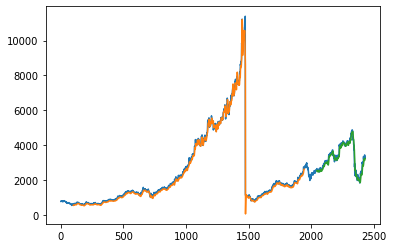

In [37]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
len(test_data)

487

In [39]:
x_input=test_data[387:].reshape(1,-1)
x_input.shape

(1, 100)

In [40]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [41]:
temp_input

[0.38855552175796626,
 0.3614606089096591,
 0.3517729908101282,
 0.3603775497976754,
 0.3449197614504696,
 0.3490031247407571,
 0.3393385504521196,
 0.3209910682188978,
 0.32134594290665414,
 0.29403441823595017,
 0.3141470563835965,
 0.28831033561006186,
 0.2673496852215432,
 0.23200047931126655,
 0.2029422337748527,
 0.22191189890219287,
 0.15870272562195248,
 0.17787978504733198,
 0.1881481071813732,
 0.20732977536893138,
 0.18415691913465881,
 0.15648591101401987,
 0.15406170210804782,
 0.15438892422273226,
 0.15329664758639128,
 0.15752288250421703,
 0.16485542313045565,
 0.18503719271078173,
 0.16065223202352313,
 0.15098765773488554,
 0.15444883813105476,
 0.16257408585202188,
 0.16258330337637916,
 0.14336476509139173,
 0.1478352644046862,
 0.15006590529915476,
 0.13198112251011623,
 0.13823060402437115,
 0.15519545760399672,
 0.1614956355022168,
 0.163491229525574,
 0.14151204269557283,
 0.13438689636737366,
 0.1439639041746168,
 0.139751495543327,
 0.13639631667726682,
 0.135

In [42]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.24706917]
101
1 day input [0.36146061 0.35177299 0.36037755 0.34491976 0.34900312 0.33933855
 0.32099107 0.32134594 0.29403442 0.31414706 0.28831034 0.26734969
 0.23200048 0.20294223 0.2219119  0.15870273 0.17787979 0.18814811
 0.20732978 0.18415692 0.15648591 0.1540617  0.15438892 0.15329665
 0.15752288 0.16485542 0.18503719 0.16065223 0.15098766 0.15444884
 0.16257409 0.1625833  0.14336477 0.14783526 0.15006591 0.13198112
 0.1382306  0.15519546 0.16149564 0.16349123 0.14151204 0.1343869
 0.1439639  0.1397515  0.13639632 0.13555752 0.1405949  0.14901511
 0.14449391 0.14213883 0.12851072 0.13093954 0.13811538 0.13326697
 0.12451954 0.11840832 0.12831255 0.12934952 0.12989796 0.14899667
 0.16608135 0.17213727 0.16302574 0.17015089 0.18092618 0.17505922
 0.17432643 0.16540847 0.17566297 0.16656067 0.16781425 0.17067168
 0.18264985 0.19856391 0.21162514 0.228696   0.22030344 0.22683867
 0.21745062 0.21325203 0.21076791 0.22209625 0.22305026 0.22003152
 0.23637419 0.25878661 0.24552259 

In [43]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [44]:
import matplotlib.pyplot as plt

In [45]:
len(df1)

2433

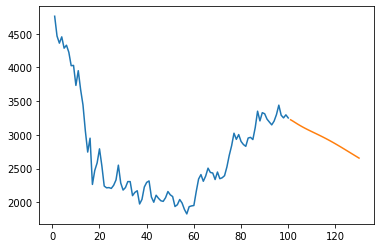

In [46]:
plt.plot(day_new,scaler.inverse_transform(df1[2333:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

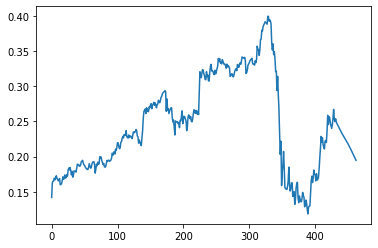

In [47]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])

In [48]:
df3=scaler.inverse_transform(df3).tolist()

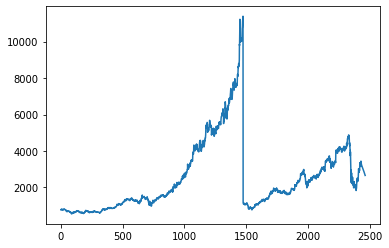

In [49]:
plt.plot(df3)

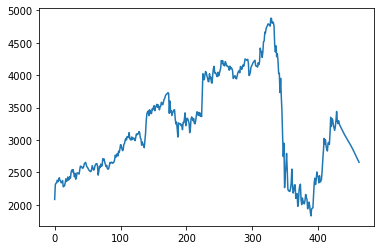

In [50]:
plt.plot(df3[2000:])